## Import TensorFlow & required Libs

In [2]:
# Import TF
import tensorflow as tf

print(tf.__version__)

2.7.0


In [4]:
# Other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

## Make the dataset - synthesis dataset

In [11]:
# Make the dataset
# We make our own dataset(synthesis dataset)
# because it is important to practice with such synthesis data as beginning
N = 1000
X = np.random.random((N, 2)) * 6 - 3   # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])

This implements Y function is: $$ y = \cos(2x_1) + cos(3x_1) $$

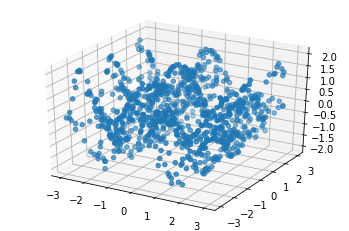

In [12]:
# plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:, 1], Y)

## Build the model


In [15]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

## Fit / Train the model

In [16]:
# Compile and fit
optimize = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=optimize, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9654
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9362
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8885
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8893
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8513
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8288
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8031
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7958
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6923
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6164
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5773
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5521
Epoch 13/100
32/32 [=================

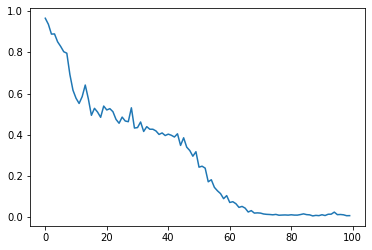

In [17]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

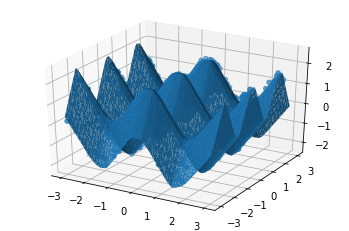

In [26]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()

ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

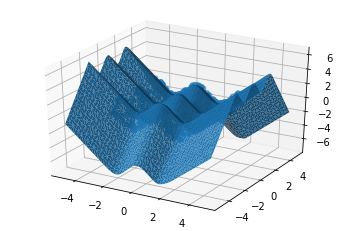

In [27]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()

ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show()